폰트 사이즈size :  10.0
폰트 글꼴(family) :  ['Malgun Gothic']
경로를 직접입력하여 남자는 manRoot,여자는womanRoot를 입력하고
기본경로의 남자는 man,여자는 woman을 입력하세요 :
파일을 읽을 기본경로값은 C:\doit폴더
파일을 쓸 기본경로값은 C:\doit폴더
man
종료하려면 Yes 파일을 더 읽으려면 No를 입력 :
Yes
성별을 입력하세요 :
남자


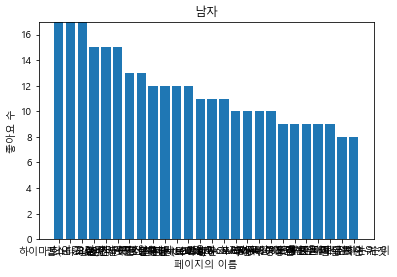

In [13]:
#제목 : 좋아요 페이지 히스토그램
#기능 : 텍스트파일을 읽어 좋아요가 많이된 페이지순으로 내림차순하여 텍트스파일로 저장하며
#       2명이상이 좋아요한 페이지를 히스토그램으로 그려준다.
#파일 이름 : SimpleAddOne.c
#수정날짜 : 2018-07-13
#작성자 : 김남균
#여자그래프추가 남자,여자 합친거 추가
import matplotlib.pyplot as plt #그래프 그려줌
import matplotlib.font_manager as fm
import numpy as np #수학 함수
#남자 좋아요 수를 넣을 딕셔너리
manLikesCnt ={} 
#남자 딕셔너리 키 저장할 리스트
manKeysList=[]   
#남자 딕셔너리 벨류값을 저장할 리스트
manValuesList=[] 
#남자 히스토그램 키
manHistKeys=[]
#남자 히스토그램 값
manHistValues=[]
#디폴트경로를 쓸지,사용자 경로를 쓸지
selectRoute=3
#히스토그램 2명이상만 띄우기 위한 변수
histCnt=0
#남자 파일을 열었는지 유무
manFileOpen=False
#여자 파일을 열었는지 유무
womanFileOpen=False
#반복을 종료할지 말지
roof = "Yes"
#여자 좋아요 수를 넣을 딕셔너리
womanLikesCnt ={} 
#여자 딕셔너리 키 저장할 리스트
womanKeysList=[]   
#여자 딕셔너리 벨류값을 저장할 리스트
womanValuesList=[] 
#여자 히스토그램 키
womanHistKeys=[]
#여자 히스토그램 값
womanHistValues=[]


#히스토그램 한글 깨짐방지  전역설정,맑은글씨체
def fontSettings() :
    path = 'C:/Windows/Fonts/malgun.ttf'

    font_name = fm.FontProperties(fname=path, size=50).get_name()

    plt.rc('font', family=font_name)


    print('폰트 사이즈size : ',plt.rcParams['font.size'] )
 

    print('폰트 글꼴(family) : ', plt.rcParams['font.family'])
    
    
#매개변수로 페이지의 이름과 좋아요된 수 그리고
#8개 이상의 좋아요가 눌린 페이지만을 담을 리스트를 매개변수로 받아 히스토그램을 그려줌
def histLikes(keysList,valuesList,histKeys,histValues,histCnt) :
    #성별을 입력할 변수명
    gender ="성별입력"
    #내림차순이므로 manValuesList가 2이 나오면 종료
    for i in range(0,len(valuesList)) :
        if valuesList[i] == 7 :
            histCnt = i-1
            break

    #3이상의 값만 따로 옮겨줌
    for i in range(0,histCnt+1) :
        histKeys.append(keysList[i])
        histValues.append(valuesList[i])
    
    
    
    #아래의 print들은 딕셔너리의 키와 벨류값을 직접 보고싶을때 사용
    
    #print(keysList)
    #print(valuesList)

    #히스토그램 제목
    print("성별을 입력하세요 :")
    gender =input()
    plt.title(gender)
    #히스토그램 x축
    plt.xlabel("페이지의 이름")
    #히스토그램 y축
    plt.ylabel("좋아요 수")
    #0부터 10까지 4개로
    #x축 0.8간격 가운데 정렬
    plt.bar(histKeys,histValues,width = 0.8,align = 'center')
    #y축의 길이를 좋아요수가 가장높은것으로 설정
    plt.ylim([0,valuesList[0]])
    plt.show()
    
#텍스트파일을 읽어 겹치는 문자열만큼 내림차순으로 정렬하여 텍스트파일로씀
def fileRWSort(keysList,valuesList,likesCnt,histCnt) :
    #히스토그램 2명이상만 띄우기 위한 변수
        #파일을 읽어 딕셔너리에 키와 값을 저장
    while True :
        line = f.readline()
        line=line.replace("\n","") ##줄바꿈 제거
        if not line : break
        #사람의 이름 건너뜀(좋아요한 페이지만을 넣기위해)
        if "검색 결과" in line :  
            continue
        #유저 id 건너뜀 (좋아요한 페이지만을 넣기우해)
        elif "Likes" in line :    
            continue
        #처음 나오는좋아요 페이지라면
        if line not in likesCnt : 
            #좋아요페이지를 키로하며 1을값으로 갖는 딕셔너리 쌍 추가
            likesCnt[line] =1  
            keysList.append(line)
            #manLikesCnt의 벨류값을 manKeyList에 추가 어차피1이기때문에 1을 넣음
            valuesList.append(1)
        else :
            #앞에서 나왔던 좋아요 페이지라면 그 좋아요 페이지를 키값으로하여 값을 1 증가
            likesCnt[line]+=1
        
    for i in range(0,len(keysList)) :
    #valuesList에 딕셔너리에 들어가있던 값들을 순차적으로 저장
        valuesList[i] = likesCnt[keysList[i]]
    #명수가 많은순서대로정렬
    for k in range(0,len(keysList)-1) :
        for j in range(0,len(keysList) -1 ) :
            #내림차순 정렬
            if valuesList[j] < valuesList[j+1] :
                #keysList(좋아요 페이지의이름을 내림차순 정렬)
                tmp = keysList[j]
                keysList[j] = keysList[j+1]
                keysList[j+1] = tmp
                #valuesList(좋아요 페이지를 몇명이 했는지 명수를 저장한 리스트 내림차순정렬)
                tmp = valuesList[j]
                valuesList[j] = valuesList[j+1]
                valuesList[j+1] = tmp
            
    for i in range(0,len(keysList)) : 
        #리스트의 길이만큼 반복
        #딕셔너리의 키값과 벨류값을 파일에 씀 키와 벨류값사이 띄어쓰기 3번
        #딕셔너리의 키값들을 리스트에 넣고 리스트를 순차적으로 호출하면서 리스트의값을 키로하여
        #딕셔너리의 값들을 호출해 결과적으로 딕셔너리의 키와 벨류값을 메모장에 저장
        f2.write(str(keysList[i]) +"   " + str(valuesList[i]) + "명\n") 



    
    

#메인함수 시작




#히스토그램 한글 깨짐방지  전역설정,맑은글씨체
fontSettings()

print("경로를 직접입력하여 남자는 manRoot,여자는womanRoot를 입력하고")
print("기본경로의 남자는 man,여자는 woman을 입력하세요 :")
print("파일을 읽을 기본경로값은 C:\doit폴더")
print("파일을 쓸 기본경로값은 C:\doit폴더")

#디폴트경로를 쓸지 사용자지정경로를쓸지 결정
while True :
    selectRoute=input()
    #f,f2는 남자 f3,f4는 여자
    #남자 입력경로
    if selectRoute == 'manRoot' :
        print("남자 좋아요 불러올 경로 입력 :")
        route = input()  #경로 입력
        print("남자 좋아요 저장할 경로 입력 :")
        route2 = input() #저장항 경로
        #cp949 코덱으로 인코딩 된 파일 UTF8로 인코딩
        f = open(route,'r',encoding='UTF8') 
        #cp949 코덱으로 인코딩 된 파일 UTF8로 인코딩
        f2 =open(route2,'w',encoding='UTF8')
        manFileOpen =True
    #남자 기본경로
    elif selectRoute == 'man' :
        f = open("C:\doit\man.txt",'r',encoding='UTF8') 
        f2 =open("C:\doit\manResult.txt",'w',encoding='UTF8')
        manFileOpen = True
    elif selectRoute == 'womanRoot' :
        print("여자 좋아요 불러올 경로 입력 :")
        route = input()  #경로 입력
        print("여자 좋아요 저장할 경로 입력 :")
        route2 = input() #저장항 경로
        #cp949 코덱으로 인코딩 된 파일 UTF8로 인코딩
        f3 = open(route,'r',encoding='UTF8') 
        #cp949 코덱으로 인코딩 된 파일 UTF8로 인코딩
        f4 =open(route2,'w',encoding='UTF8')
        womanFileOpen=True
    elif selectRoute == 'woman' :
        f3 = open("C:\doit\woman.txt",'r',encoding='UTF8') 
        f4 =open("C:\doit\womanResult.txt",'w',encoding='UTF8')
        womanFileOpen =True
    else :
        print("1이나 0을 입력하세요 :")
    print("종료하려면 Yes 파일을 더 읽으려면 No를 입력 :")
    root=input()
    if roof == 'Yes' :
        break
    elif No == 'No' :
        print("계속 탐색")
        
        
    
    

#텍스트파일을 읽어 겹치는 문자열만큼 내림차순으로 정렬하여 텍스트파일로씀
fileRWSort(manKeysList,manValuesList,manLikesCnt,histCnt)

#좋아요페이지이름과 좋아요된수를 입력받아 히스토그램을 그림
histLikes(manKeysList,manValuesList,manHistKeys,manHistValues,histCnt)
    

#남자와 여자 파일 열은것이 있다면 닫아준다.
if manFileOpen :
    
    f.close()
    f2.close()
if womanFileOpen :
    f3.close()
    f4.close()




    



